## Inverse Cooking: Recipe Generation from Food Images

In [2]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import os
from args import get_parser
import pickle
from model import get_model
from torchvision import transforms
from utils.output_utils import prepare_output
from PIL import Image
import time

Set ```data_dir``` to the path including vocabularies and model checkpoint

In [3]:
data_dir = ''

In [4]:
# code will run in gpu if available and if the flag is set to True, else it will run on cpu
use_gpu = True
device = torch.device('cuda' if torch.cuda.is_available() and use_gpu else 'cpu')
map_loc = None if torch.cuda.is_available() and use_gpu else 'cpu'


# device = torch.device('cpu')
# map_loc = None


In [5]:
print(device)

cuda


In [6]:
# code below was used to save vocab files so that they can be loaded without Vocabulary class
#ingrs_vocab = pickle.load(open(os.path.join(data_dir, 'final_recipe1m_vocab_ingrs.pkl'), 'rb'))
#ingrs_vocab = [min(w, key=len) if not isinstance(w, str) else w for w in ingrs_vocab.idx2word.values()]
#vocab = pickle.load(open(os.path.join(data_dir, 'final_recipe1m_vocab_toks.pkl'), 'rb')).idx2word
#pickle.dump(ingrs_vocab, open('../demo/ingr_vocab.pkl', 'wb'))
#pickle.dump(vocab, open('../demo/instr_vocab.pkl', 'wb'))

ingrs_vocab = pickle.load(open(os.path.join(data_dir, 'ingr_vocab.pkl'), 'rb'))
vocab = pickle.load(open(os.path.join(data_dir, 'instr_vocab.pkl'), 'rb'))

ingr_vocab_size = len(ingrs_vocab)
instrs_vocab_size = len(vocab)
output_dim = instrs_vocab_size

In [6]:
print (instrs_vocab_size, ingr_vocab_size)

23231 1488


In [7]:
t = time.time()
import sys; sys.argv=['']; del sys
args = get_parser()
args.maxseqlen = 15
args.ingrs_only=False
model = get_model(args, ingr_vocab_size, instrs_vocab_size)
# Load the trained model parameters
model_path = os.path.join('/home/ct2020dl5787/inversecooking/model/checkpoints', 'modelbest.ckpt')
model.load_state_dict(torch.load(model_path, map_location=map_loc))
model.to(device)
model.eval()
model.ingrs_only = False
model.recipe_only = False
model.reduction = 'none'
print ('loaded model')
print ("Elapsed time:", time.time() -t)


/home/ct2020dl5787/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


loaded model
Elapsed time: 5.487378120422363


In [8]:
transf_list_batch = []
transf_list_batch.append(transforms.ToTensor())
transf_list_batch.append(transforms.Normalize((0.485, 0.456, 0.406), 
                                              (0.229, 0.224, 0.225)))

to_input_transf = transforms.Compose(transf_list_batch)

In [9]:
greedy = [True, False, False, False]
beam = [-1, -1, -1, -1]
temperature = 1.0
numgens = len(greedy)

Set ```use_urls = True``` to get recipes for images in ```demo_urls```. 

You can also set ```use_urls = False``` and get recipes for images in the path in ```data_dir/test_imgs```.

In [23]:
import requests
from io import BytesIO
import random
from collections import Counter
unpickled_df = pd.read_pickle("df_recipe1023.pkl")
use_urls = False # set to true to load images from demo_urls instead of those in test_imgs folder
show_anyways = False #if True, it will show the recipe even if it's not valid
image_folder = os.path.join('/home/ct2020dl5787/inversecooking/data/'+'demo_imgs')
#TODO1:load data
if not use_urls:
    demo_imgs = os.listdir(image_folder)
    random.shuffle(demo_imgs)

demo_urls = ['https://food.fnr.sndimg.com/content/dam/images/food/fullset/2013/12/9/0/FNK_Cheesecake_s4x3.jpg.rend.hgtvcom.826.620.suffix/1387411272847.jpeg',
         'https://www.196flavors.com/wp-content/uploads/2014/10/california-roll-3-FP.jpg']

# demo_urls = unpickled_df["url"].tolist()
demo_files = demo_urls if use_urls else demo_imgs

In [24]:
demo_files.remove('.ipynb_checkpoints')
demo_files

['2.jpg', '5.jpg', '3.jpg', '1.jpg', '4.jpg', '6.jpg']

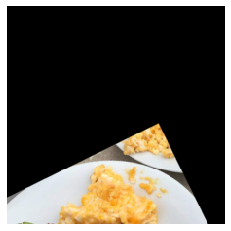

RECIPE 1

Title: Chicken enchilada dip

Ingredients:
cheese, chicken, cream, onion, pepper

Instructions:
-Preheat oven to 350 degrees f.
-In a medium bowl, combine the cream cheese, sour cream, chicken, green onions, and pepper.
-Mix well.
-Spread mixture into a 9x13 inch baking dish.
-Bake for 30 minutes.
-Serve with tortilla chips.
RECIPE 2

Title: Easy cheesy chicken dip

Ingredients:
cheese, chicken, cream, onion, pepper

Instructions:
-Mix all ingredients together and cook on stove for 30 minutes.
-Serve with tortilla chips or raw vegetables.
RECIPE 3

Title: Baked chicken doritos

Ingredients:
cheese, chicken, cream, onion, pepper

Instructions:
-Preheat oven to 350
-Place chicken breasts in a 13x9 dish.
-Pour sauce over chicken.
-Top chicken with cheese.
-Bake uncovered for 30 minutes to an hour.
-Remove from oven and sprinkle green onions on top.
RECIPE 4

Title: Creamy onion chicken

Ingredients:
cheese, chicken, cream, onion, pepper

Instructions:
-Place chicken breasts in a

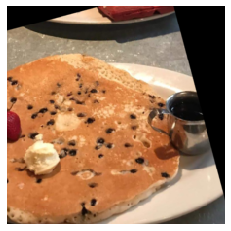

RECIPE 1

Title: Easy pancakes

Ingredients:
sugar, flour, egg, salt, baking_powder, butter, milk, oil

Instructions:
-Mix all ingredients together.
-Heat skillet and pour 1/4 cup of batter onto skillet.
-Cook until bubbles form on top.
-Flip and cook until golden brown.
RECIPE 2

Title: Basic wheat pancakes - gluten free

Ingredients:
sugar, flour, egg, salt, baking_powder, butter, milk, oil

Instructions:
-Combine dry ingredients (flour through salt) in a bowl.
-In another bowl, whisk together egg, milk, butter and oil.
-Make a well in the center of the dry ingredients and pour in the wet ingredients.
-Stir just until blended.
-Let rest about 5 minutes.
-Pour 1/2 cup batter onto greased hot griddle until bubbles appear.
-Flip and cook other side.
RECIPE 3

Title: Easy pancakes

Ingredients:
sugar, flour, egg, salt, baking_powder, butter, milk, oil

Instructions:
-Put all dry ingredients (flour, sugar, salt, baking powder) in the bowl of a food processor.
-Add eggs, milk, and oil and 

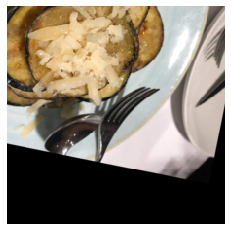

RECIPE 1

Title: Zucchini and squash saute

Ingredients:
oil, cheese, zucchini, pepper, onion, salt, squash, clove

Instructions:
-Heat oil in a large skillet over medium heat.
-Add onion and garlic; saute until tender, about 5 minutes.
-Add zucchini and squash; saute until squash is tender, about 5 minutes.
-Add salt and pepper.
-Sprinkle with cheese.
RECIPE 2

Title: Grilled summer squash

Ingredients:
oil, cheese, zucchini, pepper, onion, salt, squash, clove

Instructions:
-Preheat an outdoor grill for medium heat and lightly oil the grate.
-Brush squash slices with olive oil and sprinkle with garlic salt and pepper.
-Cook on the preheated grill until tender, about 10 to 15 minutes.
-Preheat an outdoor grill for medium-high heat and lightly oil grate.
-Place squash, zucchini, onion, and garlic on a grill; cook and stir until vegetables are tender and the onion has turned translucent, 10 to 15 minutes.
-Remove from grill.
-Brush zucchini slices with olive oil and season with salt and

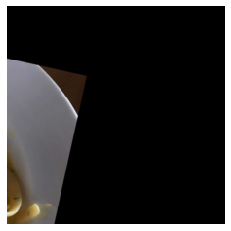

RECIPE 1

Title: Creamy parmesan sauce

Ingredients:
cheese, butter, pepper, salt, milk, cream

Instructions:
-In a medium saucepan, melt butter over medium heat.
-Add cream, milk, salt and pepper.
-Cook, stirring occasionally, until mixture is thickened and smooth.
-Remove from heat.
-Stir in parmesan cheese.
RECIPE 2

Title: Parmesan sauce ii

Ingredients:
cheese, butter, pepper, salt, milk, cream

Instructions:
-Melt the butter in a small heavy saucepan over low heat; cook and stir the grated parmesan cheese and cream until the cheese is melted and the mixture is smooth.
-Remove from heat and stir in the parmesan until the cheese has melted.
-Season to taste with black pepper, then stir in the salt.
RECIPE 3

Title: Creamy cheddar sauce

Ingredients:
cheese, butter, pepper, salt, milk, cream

Instructions:
-In a blender or food processor, puree the shredded cheddar cheese with the cream.
-With the machine on, gradually add the milk through the feed tube and process until blended.
-T

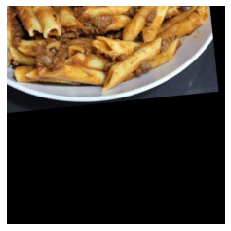

RECIPE 1

Title: Penne with beef and tomato sauce

Ingredients:
cheese, pasta, pepper, onion, oil, beef, clove, tomato, salt, basil

Instructions:
-In a large skillet, heat the oil over medium heat.
-Add the onion and garlic and cook, stirring occasionally, until the onion is translucent, about 5 minutes.
-Add the ground beef and cook, breaking up the meat with a wooden spoon, until no longer pink, about 5 minutes.
-Stir in the tomatoes, tomato paste, basil, salt and pepper.
-Bring to a boil, reduce the heat and simmer, uncovered, for 15 minutes.
-Meanwhile, cook the pasta according to package directions.
-Drain the pasta and return it to the skillet.
-Add the sauce and toss to coat.
-Sprinkle with the cheese and serve.
RECIPE 2

Title: Pasta bolognese

Ingredients:
cheese, pasta, pepper, onion, oil, beef, clove, tomato, salt, basil

Instructions:
-In a large saucepan, saute onion and garlic in olive oil over medium heat until onion becomes translucent.
-Add ground sirloin or sausage.


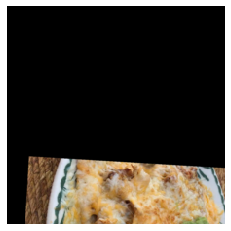

RECIPE 1

Title: Vidalia onion dip

Ingredients:
cheese, onion, pepper, mayonnaise, salt, butter, cream

Instructions:
-Preheat oven to 350 degrees f (175 degrees c).
-In a medium bowl, mix together the sour cream, mayonnaise, cheddar cheese, onion, salt and pepper.
-Transfer to a small baking dish.
-Bake in preheated oven for 30 minutes, or until bubbly and lightly browned.
RECIPE 2

Title: Blue cheese dip

Ingredients:
cheese, onion, pepper, mayonnaise, salt, butter, cream

Instructions:
-In a medium-sized bowl, combine the softened butter, sour cream, mayonnaise, green onions, blue cheese, and salt.
-Mix until blended.
-Cover and refrigerate until ready to serve.
RECIPE 3

Title: Creamy onion dip

Ingredients:
cheese, onion, pepper, mayonnaise, salt, butter, cream

Instructions:
-Preheat the oven to 350 degrees f.
-In a medium bowl, combine the mayonnaise, onions, sour cream and cheddar cheese until smooth.
-Season with salt and pepper.
-Spoon the mixture into an ovenproof dish and 

In [25]:
info_all = []
err_pic = []
start = time.time()
for img_file in demo_files:
    
    if use_urls:
        response = requests.get(img_file)
        image = Image.open(BytesIO(response.content))
    else:
        image_path = os.path.join(image_folder, img_file)
        image = Image.open(image_path).convert('RGB')
    
    

        transf_list = []
        
        #transf_list.append(transforms.RandomRotation(degrees=(135, -135)))
        transf_list.append(transforms.RandomAffine(degrees=(135, -135), translate=(0.8, 0.8)))
        transf_list.append(transforms.Resize(256))
        transf_list.append(transforms.CenterCrop(224))
        transform = transforms.Compose(transf_list)

        image_transf = transform(image)
        image_tensor = to_input_transf(image_transf).unsqueeze(0).to(device)

        plt.imshow(image_transf)
        plt.axis('off')
        plt.show()
        plt.close()

        num_valid = 1

        generate_ing = []
        generate_recipt = []
        generate_title = []
        generate_score = []
        for i in range(numgens):
            with torch.no_grad():
                outputs = model.sample(image_tensor, greedy=greedy[i],temperature=temperature, beam=beam[i], true_ingrs=None)
            ingr_ids = outputs['ingr_ids'].cpu().numpy()
            recipe_ids = outputs['recipe_ids'].cpu().numpy()

            outs, valid = prepare_output(recipe_ids[0], ingr_ids[0], ingrs_vocab, vocab)
            #TODO2: Save output  
            generate_ing.append(outs['ingrs'])
            generate_recipt.append(outs['recipe'])
            generate_title.append(outs['title'])
            generate_score.append([valid['is_valid'],valid['score']])

            if valid['is_valid'] or show_anyways:

                print ('RECIPE', num_valid)
                num_valid+=1
                #print ("greedy:", greedy[i], "beam:", beam[i])

                BOLD = '\033[1m'
                END = '\033[0m'
                print (BOLD + '\nTitle:' + END,outs['title'])

                print (BOLD + '\nIngredients:'+ END)
                print (', '.join(outs['ingrs']))

                print (BOLD + '\nInstructions:'+END)
                print ('-'+'\n-'.join(outs['recipe']))

                print ('='*20)

            else:
                pass
                print ("Not a valid recipe!")
                print ("Reason: ", valid['reason'])
        info_all.append([img_file,generate_ing, generate_recipt,generate_title,generate_score])
        
print(start-time.time())
    

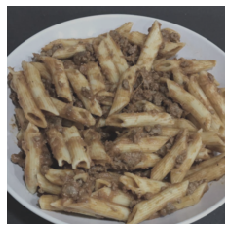

RECIPE 1

Title: Pasta with caramelized onions

Ingredients:
pepper, oil, pasta, cheese, onion, salt

Instructions:
-Heat oil in a large skillet over medium heat.
-Add onions and cook, stirring occasionally, until golden brown, about 20 minutes.
-Add salt and pepper to taste.
-Cook, stirring occasionally, until onions are golden brown, about 20 minutes.
-Meanwhile, cook pasta according to package directions.
-Drain pasta and toss with onions and cheese.
RECIPE 2

Title: Mostaccioli pasta with parmesan

Ingredients:
pepper, oil, pasta, cheese, onion, salt

Instructions:
-Boil pasta in salted water as per package directions.
-Saute onions in oil.
-Mix cooked pasta, ricotta, parmesan, salt, and pepper together.
-Pour over pasta mixture.
-Cover and simmer until pasta is tender.
RECIPE 3

Title: Ziti

Ingredients:
pepper, oil, pasta, cheese, onion, salt

Instructions:
-Preheat oven to 400 degrees f. in a large bowl combine pasta, onion, olive oil, salt and pepper.
-Toss and spread into a 9x

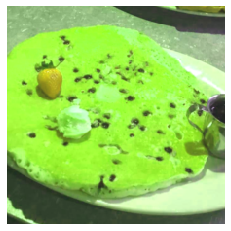

Not a valid recipe!
Reason:  Found word repeat.
Not a valid recipe!
Reason:  Found word repeat.
Not a valid recipe!
Reason:  Found word repeat.
Not a valid recipe!
Reason:  Found word repeat.


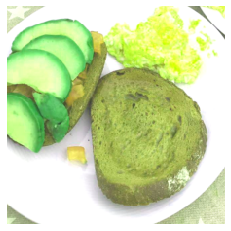

RECIPE 1

Title: Avocado cream cheese frosting

Ingredients:
avocado, sugar, egg, butter, cheese, milk

Instructions:
-Beat the cream cheese and butter together until smooth.
-Add the sugar and beat until smooth.
-Add the eggs one at a time, beating well after each addition.
-Add the milk and beat until smooth.
Not a valid recipe!
Reason:  no eos found
RECIPE 2

Title: Avocado cream cheese

Ingredients:
avocado, sugar, egg, butter, cheese, milk

Instructions:
-Place avocado, cream cheese, milk, eggs and sugar in a food processor; process until smooth.
-Pour into a serving dish.
RECIPE 3

Title: Avocado omelette roll

Ingredients:
avocado, sugar, egg, butter, cheese, milk

Instructions:
-Beat avocado, egg, milk, sugar, and cheese.
-Fold in cooked egg.
-Butter spring roll tin
-Place mixture in pan and bake in a moderate oven for 20 minutes.
-Cut into wedges, enjoy.


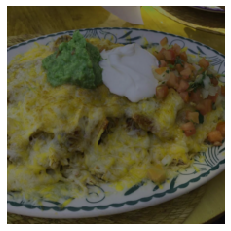

RECIPE 1

Title: Chicken enchiladas

Ingredients:
cheese, onion, cream, tortilla, chicken, pepper, beans, chili, corn, cumin, salt

Instructions:
-Preheat oven to 350 degrees.
-In a large bowl, combine chicken, beans, corn, onion, green chilies, cumin, salt and pepper.
-Spoon about 1/4 cup of chicken mixture down center of each tortilla.
-Roll up and place seam side down in a greased 13x9 baking dish.
-Pour remaining chicken mixture over tortillas.
-Sprinkle with cheese.
-Bake uncovered for 30 minutes or until heated through.
RECIPE 2

Title: Chicken, corn and black-bean burritos # 5fix

Ingredients:
cheese, onion, cream, tortilla, chicken, pepper, beans, chili, corn, cumin, salt

Instructions:
-Place a large skillet over medium-high heat.
-Add chicken, onion, green bell pepper, and jalapeno and cook until chicken is no longer pink.
-Remove from heat.
-Add the beans, corn, chile peppers, cumin, 1 cup of the sour cream, salt and pepper to the skillet; heat through.
-Place about 1/3 cup 

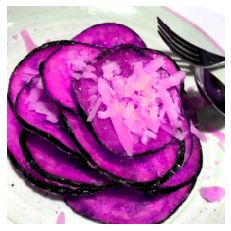

RECIPE 1

Title: Pickled beets

Ingredients:
vinegar, salt, sugar, onion, water, beet, pepper

Instructions:
-Place beets in a large saucepan and cover with water.
-Bring to a boil, reduce heat to medium-low, and simmer until tender, about 20 minutes.
-Drain and cool.
-Place beets in a large bowl.
-Stir in onion, vinegar, sugar, salt, and pepper.
-Cover and refrigerate until chilled, at least 2 hours.
RECIPE 2

Title: Pickled beets

Ingredients:
vinegar, salt, sugar, onion, water, beet, pepper

Instructions:
-Bring the vinegar, water and salt to a boil in a large saucepan.
-Stir in the sugar, then add the beets and onions.
-Reduce the heat to low, cover and simmer until tender, about 30 minutes.
-Cool, then peel and discard the beets.
-Transfer the beets to sterile containers, and refrigerate.
RECIPE 3

Title: Homemade pickled beets

Ingredients:
vinegar, salt, sugar, onion, water, beet, pepper

Instructions:
-Wash the beet roots very well and remove the stems.
-Slice the beet thinly.


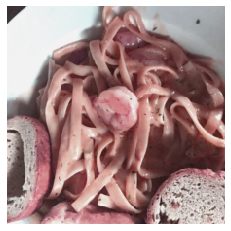

RECIPE 1

Title: Chocolate peanut butter frosting

Ingredients:
sugar, butter, chocolate

Instructions:
-In a medium bowl, beat the peanut butter and butter until smooth.
-Gradually beat in the confectioners' sugar until smooth.
RECIPE 2

Title: Chocolate icing

Ingredients:
sugar, butter, chocolate

Instructions:
-Place chocolate pieces and butter in large bowl of an electric mixer.
-Beat on low speed until blended.
-Increase speed to medium and beat until smooth.
-Add confectioner's sugar and mix until smooth.
RECIPE 3

Title: Chocolate bugles

Ingredients:
sugar, butter, chocolate

Instructions:
-Melt the butter in a saucepan on medium heat.
-Add the brown sugar and cook until melted, about 5 minutes.
-Remove from heat.
-Add the chocolate and stir until melted.
-Fill 8 wrappers with the mixture and press together to seal.
-Melt the chocolate and brush on top of the shells.
-Let cool.
-Refrigerate until set, about 15 minutes.
RECIPE 4

Title: Chocolate peanut butter frosting

Ingredi

In [16]:
info_all = []
err_pic = []
start = time.time()
for img_file in demo_files:
    
    if use_urls:
        response = requests.get(img_file)
        image = Image.open(BytesIO(response.content))
    else:
        image_path = os.path.join(image_folder, img_file)
        image = Image.open(image_path).convert('RGB')
    
    

        transf_list = []
        
        #randomly update color
        transf_list.append(transforms.ColorJitter(brightness=0.5, 
                                                  contrast=0.5, 
                                                  saturation=0.5, 
                                                  hue=0.25))
        
        #randomly change some picture to greyscale
        # transf_list.append(transforms.RandomGrayscale(p=0.3))
        
        transf_list.append(transforms.Resize(256))
        transf_list.append(transforms.CenterCrop(224))
        transform = transforms.Compose(transf_list)

        image_transf = transform(image)
        image_tensor = to_input_transf(image_transf).unsqueeze(0).to(device)

        plt.imshow(image_transf)
        plt.axis('off')
        plt.show()
        plt.close()

        num_valid = 1

        generate_ing = []
        generate_recipt = []
        generate_title = []
        generate_score = []
        for i in range(numgens):
            with torch.no_grad():
                outputs = model.sample(image_tensor, greedy=greedy[i],temperature=temperature, beam=beam[i], true_ingrs=None)
            ingr_ids = outputs['ingr_ids'].cpu().numpy()
            recipe_ids = outputs['recipe_ids'].cpu().numpy()

            outs, valid = prepare_output(recipe_ids[0], ingr_ids[0], ingrs_vocab, vocab)
            #TODO2: Save output  
            generate_ing.append(outs['ingrs'])
            generate_recipt.append(outs['recipe'])
            generate_title.append(outs['title'])
            generate_score.append([valid['is_valid'],valid['score']])

            if valid['is_valid'] or show_anyways:

                print ('RECIPE', num_valid)
                num_valid+=1
                #print ("greedy:", greedy[i], "beam:", beam[i])

                BOLD = '\033[1m'
                END = '\033[0m'
                print (BOLD + '\nTitle:' + END,outs['title'])

                print (BOLD + '\nIngredients:'+ END)
                print (', '.join(outs['ingrs']))

                print (BOLD + '\nInstructions:'+END)
                print ('-'+'\n-'.join(outs['recipe']))

                print ('='*20)

            else:
                pass
                print ("Not a valid recipe!")
                print ("Reason: ", valid['reason'])
        info_all.append([img_file,generate_ing, generate_recipt,generate_title,generate_score])
        
print(start-time.time())
    

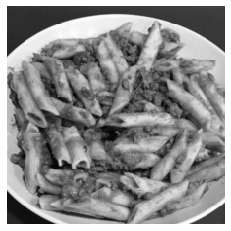

RECIPE 1

Title: Fried onions

Ingredients:
oil, salt, onion, pepper

Instructions:
-Heat oil in a large skillet over medium heat.
-Add onions and cook until golden brown, about 10 minutes.
-Season with salt and pepper.
RECIPE 2

Title: Sauteed onions

Ingredients:
oil, salt, onion, pepper

Instructions:
-Heat oil in large skillet over medium-high heat and add onions.
-Season with salt and pepper and saute until tender, about 15 minutes.
RECIPE 3

Title: Roasted pepper and onions

Ingredients:
oil, salt, onion, pepper

Instructions:
-Preheat the oven to 400f.
-Peel, seed, and dice the peppers and onions.
-Toss with oil, salt, and pepper.
-Spread out on a baking sheet.
-Roast in the oven for about 25 minutes, stirring once or twice.
RECIPE 4

Title: Easy onions

Ingredients:
oil, salt, onion, pepper

Instructions:
-Peel the onions and cut them into rings.
-Slice them into rings, but not all the way through.
-Heat 2'' vegetable oil in skillet on medium high heat for 2 minutes.
-Add the o

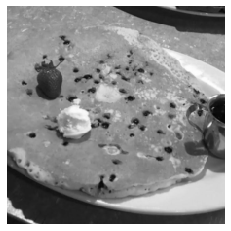

RECIPE 1

Title: Easy ice cream

Ingredients:
sugar, egg, cream, milk, extract

Instructions:
-In a large bowl, whisk together the eggs, sugar, milk, and vanilla.
-Pour into a large freezer safe bowl.
-Freeze for at least 4 hours or overnight.
RECIPE 2

Title: Royal icing ii

Ingredients:
sugar, egg, cream, milk, extract

Instructions:
-Beat egg whites until soft peaks form.
-Gradually add sugar while continuing to beat.
-Add milk, cream of tartar and vanilla and continue beating until stiff peaks form.
RECIPE 3

Title: Vanilla bean ice cream

Ingredients:
sugar, egg, cream, milk, extract

Instructions:
-Whisk together sugar, milk and cream in bowl.
-Beat egg yolks in another small bowl.
-Stir half of the sugar mixture into yolks.
-Temper eggs by stirring about a fourth into hot milk and egg mixture.
-Continue beating until mixture is thickened, about 5 minutes.
-Strain mixture into an ice cream maker.
-Freeze according to manufacturer's instructions.
-Transfer ice cream to a freezer-s

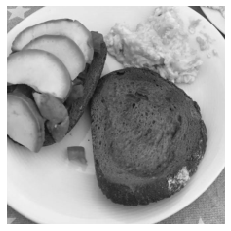

RECIPE 1

Title: Homemade self-rising flour

Ingredients:
salt, flour, water

Instructions:
-Combine all ingredients in a bowl.
-Use in any recipe calling for self-rising flour.
RECIPE 2

Title: Homemade tortillas

Ingredients:
salt, flour, water

Instructions:
-In a medium bowl, whisk together the flour, salt and water and knead to make a smooth dough.
-Divide the dough in half and roll each half into a ball.
-Wrap in plastic and let rest in the refrigerator overnight.
-On a lightly floured surface, roll out the dough into 8 inch square.
-Cut into 3 inch squares.
RECIPE 3

Title: Basic self-rising flour

Ingredients:
salt, flour, water

Instructions:
-Combine all ingredients.
-Store in air-tight container in refrigerator up to 1 month.
RECIPE 4

Title: Self-rising flour substitute

Ingredients:
salt, flour, water

Instructions:
-Combine all in air-tight container.
-Use to use 2 cups all-purpose flour, 1 cup all-purpose flour, 1 cup all-purpose flour, 1 tablespoon all-purpose flour, an

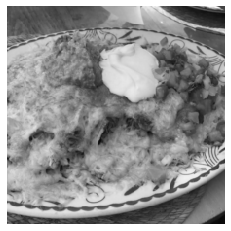

RECIPE 1

Title: Cinnamon teacake

Ingredients:
sugar, butter, cinnamon, milk, cream, flour

Instructions:
-Preheat oven to 350 degrees f (175 degrees c).
-Grease a 20cm round cake pan.
-Sift together the flour, sugar, and cinnamon.
-Stir in the butter until the mixture resembles coarse crumbs.
-Stir in the milk and cream.
-Pour into the prepared pan.
-Bake in the preheated oven for 30 to 35 minutes, or until a toothpick inserted into the centre of the cake comes out clean.
-Allow to cool in the pan for 10 minutes before turning out onto a wire rack to cool completely.
RECIPE 2

Title: Cinnamon sugar biscuits

Ingredients:
sugar, butter, cinnamon, milk, cream, flour

Instructions:
-Preheat oven to 400f
-Sift dry ingredients together into bowl.
-Rub butter into dry ingredients with fingertips until mixture resembles fine meal.
-Gradually add milk and mix with fork until dough holds together.
-Turn dough onto lightly floured surface and knead until smooth and elastic.
-Pat dough into 2''

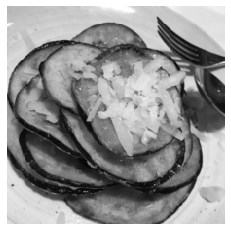

RECIPE 1

Title: Pickled cucumbers

Ingredients:
salt, water, sugar, vinegar

Instructions:
-In a large saucepan, combine the vinegar, water, sugar and salt.
-Bring to a boil, stirring to dissolve the sugar.
-Add the cucumbers and let stand for 10 minutes.
-Drain the cucumbers and pat dry.
-Transfer the cucumbers to a large bowl and let cool to room temperature.
RECIPE 2

Title: Pickled sakura

Ingredients:
salt, water, sugar, vinegar

Instructions:
-Bring 2 cups water and sugar to boil.
-Cool the syrup.
-Add the vinegar, salt and 2 cups of cold water and dissolve.
-Add the remaining 3 cups of cold water to the syrup.
-Refrigerate until cold.
RECIPE 3

Title: Homemade sushi vinegar

Ingredients:
salt, water, sugar, vinegar

Instructions:
-In a large bowl, combine the vinegar, water, sugar, and salt; stir well with a spoon.
-Place a large piece of wax paper over the edge of a clean dish; pour the liquid evenly over the paper.
-Tightly wrap the plastic wrap securely and refrigerate for 8

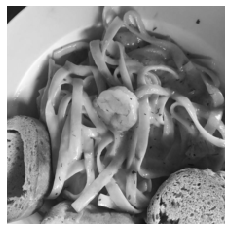

RECIPE 1

Title: Jell-o homemade jell-o

Ingredients:
sugar, water, gelatin, vinegar

Instructions:
-Dissolve gelatin in boiling water.
-Add sugar and vinegar.
-Stir until dissolved.
-Pour into molds and chill until set.
RECIPE 2

Title: Sweet and sour jell-o

Ingredients:
sugar, water, gelatin, vinegar

Instructions:
-Sprinkle gelatin over hot water in a bowl and let stand for 5 minutes.
-Whisk cold water and sugar into gelatin mixture.
-Bring to a simmer, stirring until the sugar has dissolved.
-Whisk in gelatin and vinegar.
-Let cool to room temperature.
-Pour the mixture into a mold and refrigerate for at least 4 hours or until set.
-Unmold and serve.
RECIPE 3

Title: Sweet and sour jell-o

Ingredients:
sugar, water, gelatin, vinegar

Instructions:
-Bring the vinegar to a boil.
-Add the sugar and dissolve.
-Turn off the heat and let it cool.
-Add the gelatine.
-Pour in a jar and let it cool in the fridge for 3 days.
-Serve and enjoy !
RECIPE 4

Title: Jell-o salad dressing

Ingredi

In [17]:
info_all = []
err_pic = []
start = time.time()
for img_file in demo_files:
    
    if use_urls:
        response = requests.get(img_file)
        image = Image.open(BytesIO(response.content))
    else:
        image_path = os.path.join(image_folder, img_file)
        image = Image.open(image_path).convert('RGB')
    
    

        transf_list = []
        #randomly update color
        #transf_list.append(transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.25))
        
        #randomly change some picture to greyscale
        transf_list.append(transforms.RandomGrayscale(p=1.0))
        
        transf_list.append(transforms.Resize(256))
        transf_list.append(transforms.CenterCrop(224))
        transform = transforms.Compose(transf_list)

        image_transf = transform(image)
        image_tensor = to_input_transf(image_transf).unsqueeze(0).to(device)

        plt.imshow(image_transf)
        plt.axis('off')
        plt.show()
        plt.close()

        num_valid = 1

        generate_ing = []
        generate_recipt = []
        generate_title = []
        generate_score = []
        for i in range(numgens):
            with torch.no_grad():
                outputs = model.sample(image_tensor, greedy=greedy[i],temperature=temperature, beam=beam[i], true_ingrs=None)
            ingr_ids = outputs['ingr_ids'].cpu().numpy()
            recipe_ids = outputs['recipe_ids'].cpu().numpy()

            outs, valid = prepare_output(recipe_ids[0], ingr_ids[0], ingrs_vocab, vocab)
            #TODO2: Save output  
            generate_ing.append(outs['ingrs'])
            generate_recipt.append(outs['recipe'])
            generate_title.append(outs['title'])
            generate_score.append([valid['is_valid'],valid['score']])

            if valid['is_valid'] or show_anyways:

                print ('RECIPE', num_valid)
                num_valid+=1
                #print ("greedy:", greedy[i], "beam:", beam[i])

                BOLD = '\033[1m'
                END = '\033[0m'
                print (BOLD + '\nTitle:' + END,outs['title'])

                print (BOLD + '\nIngredients:'+ END)
                print (', '.join(outs['ingrs']))

                print (BOLD + '\nInstructions:'+END)
                print ('-'+'\n-'.join(outs['recipe']))

                print ('='*20)

            else:
                pass
                print ("Not a valid recipe!")
                print ("Reason: ", valid['reason'])
        info_all.append([img_file,generate_ing, generate_recipt,generate_title,generate_score])
        
print(start-time.time())

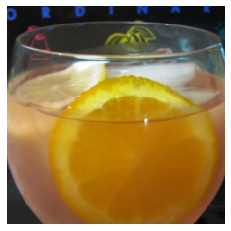

RECIPE 1

Title: Orange iced tea

Ingredients:
orange, juice, water, lemon, sugar, tea

Instructions:
-In a large pitcher, combine the tea bags, orange juice, sugar, and water.
-Cover and refrigerate for at least 4 hours.
-Serve over ice.
RECIPE 2

Title: Cranberry tea

Ingredients:
orange, juice, water, lemon, sugar, tea

Instructions:
-Combine sugar and water in a small saucepan.
-Bring to a simmer over moderately low heat, stirring, until sugar dissolves and the sugar is dissolved.
-Let cool to room temperature, then refrigerate until cold.
-Add lemon juice, tea and lemon peel to the sugar syrup and stir until well blended.
-Pour into a glass pitcher and serve over ice.
RECIPE 3

Title: Tea sangria with fruit

Ingredients:
orange, juice, water, lemon, sugar, tea

Instructions:
-In a large pitcher mix tea powder and sugar together.
-Add cold water and lemon juice.
-Chill.
-Add fruit and serve over ice.
RECIPE 4

Title: Mandarin orange and tea

Ingredients:
orange, juice, water, lemon

In [12]:
info_all = []
err_pic = []
start = time.time()
for img_file in demo_files:
    
    if use_urls:
        response = requests.get(img_file)
        image = Image.open(BytesIO(response.content))
    else:
        image_path = os.path.join(image_folder, img_file)
        image = Image.open(image_path).convert('RGB')
    
    

        transf_list = []
        #randomly update color
        #transf_list.append(transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.25))
        
        #randomly change some picture to greyscale
        # transf_list.append(transforms.RandomGrayscale(p=0.3))
        
        transf_list.append(transforms.Resize(256))
        transf_list.append(transforms.CenterCrop(224))
        transform = transforms.Compose(transf_list)

        image_transf = transform(image)
        image_tensor = to_input_transf(image_transf).unsqueeze(0).to(device)

        plt.imshow(image_transf)
        plt.axis('off')
        plt.show()
        plt.close()

        num_valid = 1

        generate_ing = []
        generate_recipt = []
        generate_title = []
        generate_score = []
        for i in range(numgens):
            with torch.no_grad():
                outputs = model.sample(image_tensor, greedy=greedy[i],temperature=temperature, beam=beam[i], true_ingrs=None)
            ingr_ids = outputs['ingr_ids'].cpu().numpy()
            recipe_ids = outputs['recipe_ids'].cpu().numpy()

            outs, valid = prepare_output(recipe_ids[0], ingr_ids[0], ingrs_vocab, vocab)
            #TODO2: Save output  
            generate_ing.append(outs['ingrs'])
            generate_recipt.append(outs['recipe'])
            generate_title.append(outs['title'])
            generate_score.append([valid['is_valid'],valid['score']])

            if valid['is_valid'] or show_anyways:

                print ('RECIPE', num_valid)
                num_valid+=1
                #print ("greedy:", greedy[i], "beam:", beam[i])

                BOLD = '\033[1m'
                END = '\033[0m'
                print (BOLD + '\nTitle:' + END,outs['title'])

                print (BOLD + '\nIngredients:'+ END)
                print (', '.join(outs['ingrs']))

                print (BOLD + '\nInstructions:'+END)
                print ('-'+'\n-'.join(outs['recipe']))

                print ('='*20)

            else:
                pass
                print ("Not a valid recipe!")
                print ("Reason: ", valid['reason'])
        info_all.append([img_file,generate_ing, generate_recipt,generate_title,generate_score])
        
print(start-time.time())

In [11]:
generate_data = pd.DataFrame(info_all,columns = ['url','generate_ingre','generate_reci','generate_title','generate_score'])
all_info = pd.merge(unpickled_df, generate_data , how='inner', on=['url'])
all_info.to_pickle('df_recipe1023_all.pkl')

In [ ]:
#TODO3: Evaluation

In [15]:
generate_data.to_pickle('output/generate_1000_backup.pkl')

In [ ]:
def get_ingred_f1(pred, label):
    '''
    input: 
        pred: a list of predicted ingredients
        label: a list of label ingredients
    output: 
        F-1 score of the prediction
    
    i.e.  
    in: 
        pred = ["tomato", "sugar", "beef"]
        label = ["potato", "tomato"]
     
    out: 
        0.4
    '''
    intersection = list(set(pred) & set(label))
    precision = len(intersection) / len(pred)
    recall = len(intersection) / len(label)
    f1 = 2 * precision * recall / (precision + recall)
    return f1


def get_ingred_IOU(pred, label):
    '''
    input: 
        pred: a list of predicted ingredients
        label: a list of label ingredients
    output: 
        IOU of the prediction
    
    i.e.  
    in: 
        pred = ["tomato", "sugar", "beef"]
        label = ["potato", "tomato"]
     
    out: 
        0.25
    '''
    intersection = len(list(set(pred) & set(label)))
    union = len(list(set(pred) | set(label)))
    iou = intersection / union
    return iou


import nltk
import string
def get_bleu_n_score(pred, label, n = 4):
    
    '''
    TODO: STEM not added
    input: 
        pred: One string of predict recipe 
        label: One string of reference recipe
        n(optional): up to n-gram.
    output: 
        bleu score
    
    i.e.  
    in: 
        pred = "Add the buttter"
        label = "Add half butter and mix well"
    out: 
        0.25
    '''
    weights = [1/n] * n
    pred_list = pred.translate(str.maketrans('', '', string.punctuation)).split()
    label_list = label.translate(str.maketrans('', '', string.punctuation)).split()
    BLEUscore = nltk.translate.bleu_score.sentence_bleu([label_list], pred_list, weights)
    return BLEUscore



from nltk.translate.meteor_score import meteor_score
def get_meteor_score(pred, label):
    return meteor_score([label], pred)